<h1>Data mining</h1>

<h2>Reading in neccesary dependencies</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Importing dataset</h3>

In [2]:
data =  pd.read_csv("data/cleanedData.csv")

<h2>Statistical figures in whole dataset<h2>

Total number of cars: 639914
Cars without registration: 59250
Cars with automatic transimssions: 296679
Gasoline cars: 53.74
Diesel cars: 45.96
Electric cars: 0.0
Top 1 brand: VOLKSWAGEN 12.3
Top 2 brand: TOYOTA 9.4
Top 3 brand: AUDI 6.8
Top 1 model: AVENSIS 2.5
Top 2 model: OCTAVIA 2.3
Top 3 model: PASSAT 2.3
Avg enginge: 106.12924189813032
Avg CO2: 164.62602383005444
Avg Mass: 1560.1629375197292


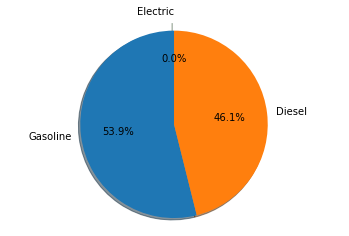

In [3]:

cars = len(data)
print("Total number of cars: " + str(cars))

stopedCars = len(data[data["Üldine staatus"] == "PEATATUD"])
print("Cars without registration: " + str(stopedCars))

atCars = len(data[(data["Käigukasti tüüp"] == "CVT") |
                         (data["Käigukasti tüüp"] == "AUTOMAAT")])
print("Cars with automatic transimssions: " + str(atCars))


gasolineCars = len(data[(data["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                              (data["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                              (data["Mootori tüüp"] == "BENSIIN")])
dieselCars = len(data[(data["Mootori tüüp"] == "DIISEL") |
                              (data["Mootori tüüp"] == "DIISEL_HYBRIID")])
electricCars = len(data[(data["Mootori tüüp"] == "ELEKTER")])

gasolinePercentage = round((gasolineCars/cars) * 100, 2)
dieselPercentage =  round((dieselCars/cars) * 100, 2)
electricPercentage =  round((electricCars/cars) * 100, 2)

print("Gasoline cars: " + str(gasolinePercentage))
print("Diesel cars: " + str(dieselPercentage))
print("Electric cars: " + str(electricPercentage))



topBrands = data.groupby("Mark").size().sort_values(ascending=False)
topModels = data.groupby("Mudel").size().sort_values(ascending=False)

topColors = data.groupby("Värv").size().sort_values(ascending=False)
topType = data.groupby("Keretüüp").size().sort_values(ascending=False)

brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

print("Top 1 brand: " + str(brand1))
print("Top 2 brand: " + str(brand2))
print("Top 3 brand: " + str(brand3))

model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))

print("Top 1 model: " + str(model1))
print("Top 2 model: " + str(model2))
print("Top 3 model: " + str(model3))


avgEngine = data["Mootori võimsus"].mean()
avgCO2 = data["CO2"].mean()
avgMass = data["Tühimass"].mean()

print("Avg enginge: " + str(avgEngine))
print("Avg CO2: " + str(avgCO2))
print("Avg Mass: " + str(avgMass))



labels = 'Gasoline', 'Diesel', 'Electric'
sizes = [gasolinePercentage, dieselPercentage, electricPercentage]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() 



<h2>Finding statistical figures per county</h2>

In [4]:
county_dataset = pd.DataFrame(columns=["County","Total","w/o reg. %", "AT %",
                                       "gasoline %", "diesel %", "electric %",
                                       "Top color", "Top type", "Avg engine",
                                       "Avg CO2", "Avg empty mass",
                                       "Brand 1", "Brand 2", "Brand 3",
                                      "Model 1", "Model 2", "Model 3"])

i =0
for county in data["Maakond"].unique():
    countyData = data.loc[data['Maakond'] == county]
    
    cars = len(countyData)
    stopedCars = len(countyData[countyData["Üldine staatus"] == "PEATATUD"])
    atCars = len(countyData[(countyData["Käigukasti tüüp"] == "CVT") |
                             (countyData["Käigukasti tüüp"] == "AUTOMAAT")])
    stopedPercentage = round((stopedCars/cars) * 100, 2)
    atPercentage = round((atCars/cars) * 100, 2)
    
    gasolineCars = len(countyData[(countyData["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                                  (countyData["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                                  (countyData["Mootori tüüp"] == "BENSIIN")])
    dieselCars = len(countyData[(countyData["Mootori tüüp"] == "DIISEL") |
                                  (countyData["Mootori tüüp"] == "DIISEL_HYBRIID")])
    electricCars = len(countyData[(countyData["Mootori tüüp"] == "ELEKTER")])
    
    gasolinePercentage = round((gasolineCars/cars) * 100, 2)
    dieselPercentage =  round((dieselCars/cars) * 100, 2)
    electricPercentage =  round((electricCars/cars) * 100, 2)
    
    topBrands = countyData.groupby("Mark").size().sort_values(ascending=False)
    topModels = countyData.groupby("Mudel").size().sort_values(ascending=False)
    
    topColors = countyData.groupby("Värv").size().sort_values(ascending=False)
    topType = countyData.groupby("Keretüüp").size().sort_values(ascending=False)
    
    avgEngine = countyData["Mootori võimsus"].mean()
    avgCO2 = countyData["CO2"].mean()
    avgMass = countyData["Tühimass"].mean()
    
    brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
    brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
    brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

    model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
    model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
    model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))
    
    county_dataset.loc[i] = [county] + [cars] + [stopedPercentage] + [atPercentage] + [gasolinePercentage]  + [dieselPercentage] + [electricPercentage] + [topColors.index[0]] + [topType.index[0]] + [avgEngine] + [avgCO2] + [avgMass] + [brand1] + [brand2] + [brand3] + [model1] + [model2] + [model3]
    i +=1

county_dataset = county_dataset.sort_values(by="Total", ascending= False)
display(county_dataset)

county_dataset.to_excel("data/countys.xlsx")

,County,Total,w/o reg. %,AT %,gasoline %,diesel %,electric %,Top color,Top type,Avg engine,Avg CO2,Avg empty mass,Brand 1,Brand 2,Brand 3,Model 1,Model 2,Model 3
0,HARJU MAAKOND,279746,9.59,54.14,58.65,41.02,0.0,MUST,UNIVERSAAL,110.020816,161.500901,1568.812727,TOYOTA 11.3,VOLKSWAGEN 9.8,BMW 6.7,OCTAVIA 2.7,AVENSIS 2.6,COROLLA 2.3
3,TARTU MAAKOND,70128,6.96,44.48,50.60,48.96,0.0,MUST,UNIVERSAAL,106.370100,165.261051,1570.380076,VOLKSWAGEN 15.3,AUDI 8.0,FORD 7.9,PASSAT VARIANT 3.3,PASSAT 2.9,OCTAVIA 2.5
5,IDA-VIRU MAAKOND,50532,10.82,39.09,48.26,51.60,0.0,MUST,UNIVERSAAL,102.832554,171.015630,1573.507322,VOLKSWAGEN 13.3,TOYOTA 9.9,BMW 6.8,AVENSIS 2.7,CR-V 2.4,PASSAT 2.2
1,PÄRNU MAAKOND,40906,7.88,43.35,51.92,47.70,0.0,MUST,UNIVERSAAL,104.264888,167.200889,1550.478121,VOLKSWAGEN 12.4,FORD 8.6,AUDI 7.7,PASSAT VARIANT 2.4,PASSAT 2.4,AVENSIS 2.3
10,LÄÄNE-VIRU MAAKOND,29156,8.73,38.22,50.28,49.49,0.0,MUST,UNIVERSAAL,101.346865,166.928143,1542.881602,VOLKSWAGEN 12.4,TOYOTA 11.1,VOLVO 7.4,AVENSIS 3.5,PASSAT 2.3,PASSAT VARIANT 2.2
6,VILJANDI MAAKOND,24163,8.01,39.40,50.82,48.93,0.0,MUST,UNIVERSAAL,100.987332,164.893401,1535.656086,VOLKSWAGEN 15.8,AUDI 8.2,FORD 7.6,PASSAT VARIANT 3.0,PASSAT 2.7,OCTAVIA 2.5
13,VÕRU MAAKOND,19173,8.47,33.45,42.54,57.26,0.0,MUST,UNIVERSAAL,99.981954,165.983303,1539.144265,VOLKSWAGEN 19.9,AUDI 10.3,FORD 7.0,PASSAT VARIANT 5.3,PASSAT 3.6,A6 AVANT 3.0
12,RAPLA MAAKOND,18233,8.45,42.94,50.38,49.48,0.0,MUST,UNIVERSAAL,102.917216,165.730519,1551.473592,VOLKSWAGEN 12.9,TOYOTA 8.6,AUDI 7.9,PASSAT 2.4,PASSAT VARIANT 2.3,OCTAVIA 2.3
11,SAARE MAAKOND,17992,5.64,40.02,58.18,41.70,0.0,MUST,UNIVERSAAL,100.966468,167.261762,1523.773455,VOLKSWAGEN 10.8,TOYOTA 10.0,AUDI 6.4,AVENSIS 2.6,PASSAT VARIANT 2.2,OCTAVIA 2.1
8,JÄRVA MAAKOND,15431,8.74,37.19,49.34,50.52,0.0,MUST,UNIVERSAAL,101.822338,167.350435,1539.740652,VOLKSWAGEN 13.5,FORD 9.1,TOYOTA 8.8,PASSAT VARIANT 2.8,PASSAT 2.6,AVENSIS 2.5


<h2>Statistical figures per city</h2>

In [15]:
city_dataset = pd.DataFrame(columns=["city","Total","w/o reg. %", "AT %",
                                       "gasoline %", "diesel %", "electric %",
                                       "Top color", "Top type", "Avg engine",
                                       "Avg CO2", "Avg empty mass",
                                       "Brand 1", "Brand 2", "Brand 3",
                                      "Model 1", "Model 2", "Model 3"])

i =0
for city in data["Linn"].unique():
    cityData = data.loc[data['Linn'] == city]
    
    cars = len(cityData)
    
    if cars ==0: continue
        
    stopedCars = len(cityData[cityData["Üldine staatus"] == "PEATATUD"])
    atCars = len(cityData[(cityData["Käigukasti tüüp"] == "CVT") |
                             (cityData["Käigukasti tüüp"] == "AUTOMAAT")])
    stopedPercentage = round((stopedCars/cars) * 100, 2)
    atPercentage = round((atCars/cars) * 100, 2)
    
    gasolineCars = len(cityData[(cityData["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                                  (cityData["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                                  (cityData["Mootori tüüp"] == "BENSIIN")])
    dieselCars = len(cityData[(cityData["Mootori tüüp"] == "DIISEL") |
                                  (cityData["Mootori tüüp"] == "DIISEL_HYBRIID")])
    electricCars = len(cityData[(cityData["Mootori tüüp"] == "ELEKTER")])
    
    gasolinePercentage = round((gasolineCars/cars) * 100, 2)
    dieselPercentage =  round((dieselCars/cars) * 100, 2)
    electricPercentage =  round((electricCars/cars) * 100, 2)
    
    topBrands = cityData.groupby("Mark").size().sort_values(ascending=False)
    topModels = cityData.groupby("Mudel").size().sort_values(ascending=False)
    
    topColors = cityData.groupby("Värv").size().sort_values(ascending=False)
    topType = cityData.groupby("Keretüüp").size().sort_values(ascending=False)
    
    avgEngine = cityData["Mootori võimsus"].mean()
    avgCO2 = cityData["CO2"].mean()
    avgMass = cityData["Tühimass"].mean()
    
    brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
    brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
    brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

    model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
    model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
    model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))
    
    city_dataset.loc[i] = [city] + [cars] + [stopedPercentage] + [atPercentage] + [gasolinePercentage]  + [dieselPercentage] + [electricPercentage] + [topColors.index[0]] + [topType.index[0]] + [avgEngine] + [avgCO2] + [avgMass] + [brand1] + [brand2] + [brand3] + [model1] + [model2] + [model3]
    i +=1

city_dataset = city_dataset.sort_values(by="Total", ascending= False)
display(city_dataset)

city_dataset.to_excel("data/cities.xlsx")

,city,Total,w/o reg. %,AT %,gasoline %,diesel %,electric %,Top color,Top type,Avg engine,Avg CO2,Avg empty mass,Brand 1,Brand 2,Brand 3,Model 1,Model 2,Model 3
0,Tallinn,185510,8.97,56.18,60.65,39.00,0.0,MUST,UNIVERSAAL,111.398545,162.712674,1572.783952,TOYOTA 12.1,VOLKSWAGEN 9.8,BMW 6.9,AVENSIS 2.8,OCTAVIA 2.7,COROLLA 2.5
2,Tartu linn,39366,6.57,46.30,54.77,44.74,0.0,MUST,UNIVERSAAL,107.235528,164.345022,1566.483031,VOLKSWAGEN 14.6,TOYOTA 7.9,FORD 7.7,PASSAT VARIANT 2.9,PASSAT 2.7,OCTAVIA 2.5
1,Pärnu linn,22253,7.10,47.49,54.33,45.29,0.0,MUST,UNIVERSAAL,106.750456,166.580376,1561.769874,VOLKSWAGEN 12.2,FORD 8.5,TOYOTA 7.8,AVENSIS 2.4,PASSAT 2.3,FOCUS 2.1
6,Narva linn,18760,14.77,40.77,54.73,45.14,0.0,MUST,UNIVERSAAL,104.321285,176.531073,1581.439019,VOLKSWAGEN 11.6,TOYOTA 10.1,BMW 8.0,CR-V 2.7,AVENSIS 2.6,A6 1.8
3,Kohtla-Järve linn,11682,8.25,36.18,41.05,58.92,0.0,MUST,UNIVERSAAL,101.650599,168.796835,1571.425441,VOLKSWAGEN 14.6,TOYOTA 8.9,AUDI 7.7,PASSAT 2.6,AVENSIS 2.3,PASSAT VARIANT 2.3
11,Viljandi linn,7924,7.04,45.43,54.35,45.39,0.0,MUST,UNIVERSAAL,104.141368,164.216407,1544.180591,VOLKSWAGEN 14.9,AUDI 7.9,TOYOTA 7.6,OCTAVIA 2.7,PASSAT VARIANT 2.4,PASSAT 2.4
12,Maardu linn,7087,10.02,47.33,53.20,46.45,0.0,MUST,UNIVERSAAL,106.175900,168.151860,1570.496261,TOYOTA 12.9,VOLKSWAGEN 9.6,BMW 6.4,AVENSIS 3.2,COROLLA 2.5,RAV4 2.3
7,Rakvere linn,7084,8.41,43.32,53.73,45.85,0.0,MUST,UNIVERSAAL,104.287211,164.923765,1549.481649,TOYOTA 12.8,VOLKSWAGEN 11.3,VOLVO 7.7,AVENSIS 3.9,COROLLA 2.7,PASSAT 2.2
4,Haapsalu linn,6425,6.66,44.98,58.24,40.59,0.0,MUST,UNIVERSAAL,102.455969,162.689050,1527.616654,VOLKSWAGEN 10.6,TOYOTA 9.6,KIA 6.8,OCTAVIA 2.8,COROLLA 2.7,PASSAT 2.2
9,Võru linn,5588,7.46,38.71,46.35,53.40,0.0,MUST,UNIVERSAAL,103.281478,165.473245,1552.987294,VOLKSWAGEN 18.3,AUDI 9.8,TOYOTA 7.6,PASSAT VARIANT 4.4,PASSAT 3.5,AVENSIS 2.9
